# Elliptic equations


## Introduction

Elliptic equations are a subclass of second-order partial differential equations. They commonly arise in steady-state or equilibrium settings, such as electrostatics, which reach steady-state so fast that we commonly assume it is always steady. It also arises in steady-state fluid flow; incompressible fluid flow instantly is at steady-state. Steady-state heat conduction is also described by elliptic equations.

As presented in the previous note, all second-order linear partial differential equations of two variables can be written in the form

$$A \frac{\partial^2 f}{\partial x^2} + B \frac{\partial^2 f}{\partial x \partial y} + C \frac{\partial^2 f}{\partial y^2} + D \frac{\partial f}{\partial x} +  E \frac{\partial f}{\partial y} + F f + G = 0$$

An <i>elliptic</i> second-order partial differential equation is an equation on the form above where $B^2-AC < 0$.

Two typical elliptic equations are the Laplace equation's $\nabla^2 f = 0$ and the Poisson equation's $\nabla^2 f = g$, where $f$ and $g$ are functions. We see that for the Laplace equation we have $A= 1 = C$, while all the other pre-factors are zero, thus $B^2 - AC = 0 - 1 = -1 < 0$, as required to be an elliptic equation. For the Poisson equation, we also have $F = -1$, however, this is not affecting the equation $B^2 - AC = -1$. In this section, we will mostly investigate Laplace equations, here exemplified by a solution of fluid flow through porous media.

As mentioned, the elliptic equations usually describe physics where we have no change with time, i.e., equilibrium or steady-state situations. This is in contrast to settings where we are evolving towards a steady state, or where we have wave-like situations that fluctuate. If the property field (e.g., the conductance) and the boundary conditions vary smoothly, the solution will also be smooth.

## Laplace equation

A <i>Laplace equation</i> is a PDE of the form

$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} = 0$$

Here $\Delta = \nabla^2 = \nabla \cdot \nabla$ is the Laplace operator, with $\nabla \cdot$ being the divergence operator, and $\nabla$ being the gradient. Thus, the Laplace operator gives the divergence of the gradient of the field $f$. Remember that

$$\nabla = \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y} \right)$$

with the obvious extension to higher dimensions.

This type of equation where first investigated by the French mathematician Pierre-Simon Laplace, thereby its name. Steady state heat flux, steady state fluid flow (at the continuum scale in a porous medium), and steady state diffusion are some of the problems that are described by such an equation.

A function that satisfies the Laplace equation, i.e., a function $f$ such that $\nabla^2 f = 0$, is called a <i>potential function</i>.

Any flux that is proportional to a potential and at steady-state is described by the Laplace equation. Many physical systems are of this type. Consider a flux $\vec{j}$ driven by a concentration gradient $\nabla c$:
$$\vec{j} = - D \nabla c$$
Here, $D$ is a proportionality constant, such as the diffusion constant in Fick's first law. The continuity equation says that the change in density in a volume equals the flow into and out of that volume, which, when reduced to one point, is given by the equation:
$$\frac{\partial c}{\partial t} = - \nabla \cdot \vec{j}$$
At steady-state, we have $\partial c / \partial t = 0$, which then gives $\nabla \cdot \vec{j} = 0$. If we fill in the equation for $\vec{j}$ above, we get
$$\nabla \cdot D \nabla c = 0$$
For a constant $D$, we then get $\nabla^2 c = 0$. Thus, the steady state of such physical systems is described by the Laplace equation. As an example of such a system, we will investigate the fluid flow in a porous medium considered at the continuum scale.

As a side note: Fluid flow within the pores in a porous medium is described by the Navier-Stokes equation, where you do not have a proportional relation between potential (pressure) and flux (fluid velocity); thus, its solution is not given by a solution to the Laplace equation. In fact, the solution is so complicated that it is one of the Millennium problems in mathematics to show that a smooth solution always exists. In contrast, solutions to the Laplace equation are known to have smooth solutions when the boundary conditions and underlying property field are smooth.

### Fluid flow

No fluid is fully incompressible, but when we mathematically describe fluid flow, we can assume that it is incompressible. Incompressible fluid flow will instantly reach a steady state, thereby being governed by an elliptic equation. In general, fluid flow is governed by the Navier-Stokes equations; however, we will consider flow within a porous medium. For porous medium flow, the fluid flow is described by Darcy's equation:

$$\vec{q} = -\frac{k}{\mu} \nabla p$$

Here $q$ is the volumetric flow rate, $k$ is the permeability (a measure of how well the porous medium allows for transport of fluids), $\mu$ is the viscosity of the fluid, and $p$ is the fluid pressure.

Assume a volume element $V$ with surface area $A$. The flow rate over the surface $A$ is given by

$$\int_A \vec{q} \cdot \vec{n} dA$$

From Gauss's divergence theorem, we have that

$$\int_A \vec{q} \cdot \vec{n} dA = \int_V \nabla \cdot \vec{q} dV$$

If we are at steady state, due to mass conservation, we cannot have a build-up (or draw-down) of mass. Thus, when assuming constant density of the fluid, the total flow rate over the surface of any volume element $V$ must be zero. Thus

$$\int_V \nabla \cdot \vec{q} dV = 0$$

Since this holds for any volume element, we then have $\nabla \cdot q = 0$. Thus, we see that a steady fluid flow is described by

$$\begin{align}
\nabla \cdot q &= 0 \\
\nabla \cdot \left(\frac{k}{\mu} \nabla p \right) &= 0 \\
\nabla \cdot  \nabla p  &= 0 \\
\nabla^2 p  &= 0 
\end{align}$$

Thus, a steady fluid flow in a porous medium is given by the Laplace equation.

Here we have assumed a constant permeability $k$ and viscosity $\mu$. Note that, in general, the viscosity is dependent on pressure. Further, for any natural porous medium, the permeability varies.

## Finite difference approximation

We already mentioned finite difference approximation when considering ordinary differential equations and in the introduction to partial differential equations. Finite differences can be used to approximate derivatives. When we replace a derivative with a finite difference, we are doing an approximation, and the resulting system is our numerical scheme.

We will now investigate numerical solutions to the Laplace equation. For this, we will use finite differences. Earlier, we used the forward and backward finite differences to estimate a first-order derivative. The Laplace equation contains a second-order derivative, so we now need an approximation for this. The centered difference for the second-order derivative is given as

$$\frac{\partial^2 f}{\partial x^2} \simeq \frac{f(x+\Delta x) - 2 f(x) +f(x-\Delta x)}{(\Delta x)^2}$$

Assume a 1D problem of length $L$. We will discretize this using $n+1$ points, starting counting at zero, with the first point (index $i=0$) being the left boundary and the last point (index $i = n$) being the right boundary. We will fix the boundary conditions, with $f(0) = f_0$ and $f(L) = f_n$ being constant values. The length between the grid vertices is $\Delta x = L/n$. From our finite difference, we then get the following equation for each internal vertex $i$:

$$f_{i+1} - 2f_i + f_{i-1} \simeq (\Delta x)^2 f''(x_i) = 0$$

where the last equality is due to $f$ being a solution to the Laplace equation.

At the left boundary, we have

$$\begin{align}
f_2 - 2f_1 + f_0 &= 0 \\
f_2 - 2f_1  &= -f_0 
\end{align}$$

At the right boundary, we have 
$$\begin{align}
f_n - 2f_{n-1} + f_{n-2} &= 0 \\
-2f_{n-1} + f_{n-2}  &= -f_n 
\end{align}$$



### Solution by matrix inversion

The set of equations above can be written in matrix form as $\mathbf{A} \vec{x} = \vec{b}$, where $\mathbf{A}$ is the $n-1 \times n-1$ matrix

$$\mathbf{A} = 
\begin{bmatrix}
-2&1&0&0&\cdots&0&0&0 \\
1&-2&1&0&\cdots&0&0&0 \\
0&1&-2&1&\cdots&0&0&0 \\
\vdots&\vdots&\vdots&\vdots& & \vdots&\vdots&\vdots \\
0&0&0&0&\cdots&1&-2&1 \\
0&0&0&0&\cdots&0&1&-2 
\end{bmatrix}$$

The unknowns are given by the vector
$$\vec{x} = 
\begin{bmatrix}
f_1\\
f_2\\
\vdots \\
f_{n-1}
\end{bmatrix}$$

Finally, the boundary conditions are collected in the vector
$$\vec{x} = 
\begin{bmatrix}
-f_0\\
0\\
0\\
\vdots \\
0\\
-f_{n}
\end{bmatrix}$$

Such a system can be solved in Python as follows:

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.]]


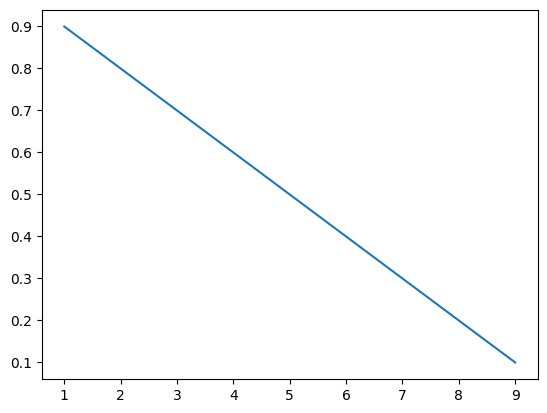

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Creating a class for our problem
class Celliptic:
    def __init__(self):
        #Length
        self.fL=10.0
        #Number of grid cells
        self.iN=11
        #Left boundary condition
        self.fBl=1.0
        #Right boundary condition
        self.fBr=0.0

        #Length vector
        self.afLv= np.linspace(0.0,self.fL,self.iN)
        
    def matrixSolution(self):
        # Boundary conditions vector
        afBc=np.zeros(self.iN-2)
        afBc[0]=-self.fBl
        afBc[-1]=-self.fBr

        #Matrix
        aafA=np.zeros((self.iN-2,self.iN-2))
        for ii in range(1,self.iN-3):
            aafA[ii,ii-1]=1
            aafA[ii,ii]=-2
            aafA[ii,ii+1]=1
        aafA[0,0]=-2
        aafA[0,1]=1
        aafA[-1,-1]=-2
        aafA[-1,-2]=1

        print(aafA)

        #Solve system using numpy
        afx=np.dot(np.linalg.inv(aafA),afBc)
        
        return afx
    
    def plotMatrixSolution(self):
        afx=self.matrixSolution()

        #Plot solution values
        fig = plt.figure()
        plt.plot(self.afLv[1:-1],afx)
        plt.show()

tOneDim=Celliptic()
tOneDim.plotMatrixSolution()

The solution for such a one-dimensional system is quite simple; however, whenever you want a solution in a complex geometry, you will also get non-trivial and interesting solutions. You will also observe that creating the matrix $A$ can become quite complicated.

Matrix inversion is an operation that is needed in a lot of numerical problems, and can be computationally heavy. It is often the most computationally demanding part of a numerical code. Often, we only approximate the inverse by an iterative method, such as the conjugate gradient method for matrix inversion. We will return to the problem of matrix inversion later in these notes.


### Relaxation methods

From our finite difference approximation, we have the following equation

$$f_{i+1} - 2f_i + f_{i-1} = 0$$

which can be rearranged as follows:


$$f_i = \frac{f_{i+1} + f_{i-1}}{2}$$

We now want to obtain a solution by iteratively trying to converge towards the right solution by using the equation above. 

#### Jacobi relaxation

We start with a relaxation method called <i>Jacobi relaxation</i>. Let $f_i^m$ be the solution at iteration $m$, then we calculate the value in the next iteration as

$$f_i^{m+1} = \frac{f_{i+1}^m + f_{i-1}^m}{2}$$

This method is named after the German mathematician Carl Gustav Jacob Jacobi. The method can be implemented in Python as follows:


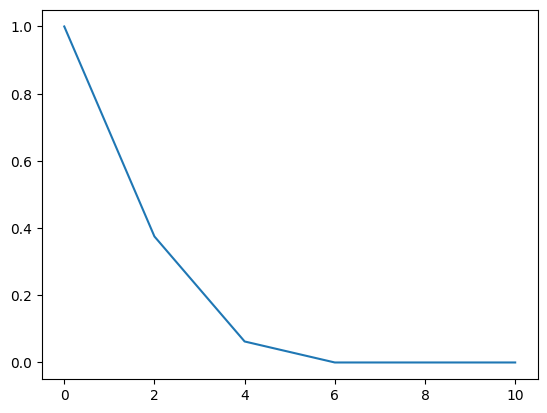

In [2]:
def jacobiRelaxation(self,iIterations):
    #Solution vector
    afJR=np.zeros(self.iN)
    #Set boundary conditions
    afJR[0]=self.fBl
    afJR[-1]=self.fBr
    afJRnew=np.copy(afJR)

    #Number of iterations
    itn=iIterations

    for it in range(0,itn):
        for ii in range(1,self.iN-1):
            afJRnew[ii]=(afJR[ii-1]+afJR[ii+1])/2
        #Alternative (faster) way by slicing:
        #afJRnew[1:self.iN-1]=0.5*(afJR[:self.iN-2]+afJR[2:])
        afJR=np.copy(afJRnew)
    return afJR

def plotJacobiRelaxation(self,iIterations):
    afSol=self.jacobiRelaxation(iIterations)
    #Plot solution values
    fig = plt.figure()
    plt.plot(self.afLv,afSol)
    plt.show()

#Adding Jacobi relaxation function to class
Celliptic.jacobiRelaxation=jacobiRelaxation
Celliptic.plotJacobiRelaxation=plotJacobiRelaxation


tOneDim.plotJacobiRelaxation(5)


We already know the solution, being the straight line between the points $(0,1)$ and $(10,0)$. We observe that our current iterative solution is quite far from the solution. We thus need more iterations to converge towards the right solution. We should therefore try to run the Jacobi relaxation with different numbers of iterations to see how fast it converges towards the right solution. The next code is doing exactly that.


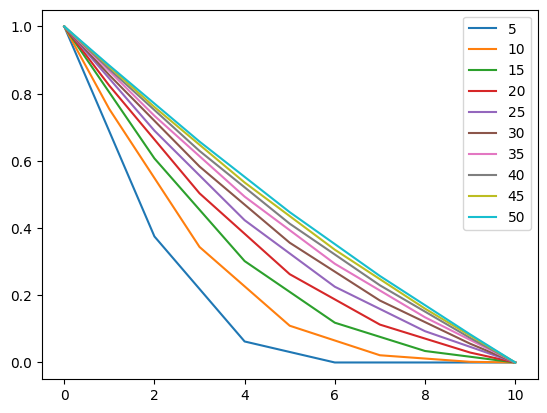

In [3]:
#Plot solution values
fig = plt.figure()
for iIteration in np.arange(5,51,5):
    afJacobi=tOneDim.jacobiRelaxation(iIteration)
    plt.plot(tOneDim.afLv,afJacobi,label=str(iIteration))
plt.legend(loc='best')
plt.show()


#### Gauss-Seidel relaxation

The Jacobi relaxation needs two copies of each grid cell in its memory, as we cannot overwrite $f^m$ before we are finished calculating $f^{m+1}$. The next method is almost the same as the Jacobi relaxation; however, it continuously overwrites values and thereby reduces the need for memory. The next method, called <i>Gauss-Seidel relaxation</i>, continuously uses the current values in a single copy of the grid.

It has been shown that one obtains a faster convergence by using the current best value when updating the cell values. Gauss-Seidel converges twice as fast as Jacobi [1]. Thus, we calculate

$$f_i = \frac{f_{i+1} + f_{i-1}}{2}$$

with whatever value we currently have for $f_{i+1}$ and $f_{i-1}$. This can be done in Python as follows:

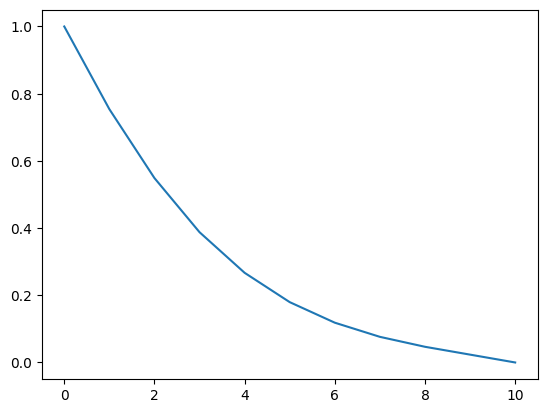

In [4]:
def gaussSeidel(self,iIterations):
    #Solution vector
    afGS=np.zeros(self.iN)
    #Set boundary conditions
    afGS[0]=self.fBl
    afGS[-1]=self.fBr

    #Number of iterations
    itn=iIterations

    for it in range(0,itn):
        for ii in range(1,self.iN-1):
            afGS[ii]=(afGS[ii-1]+afGS[ii+1])/2
    
    return afGS

def plotGaussSeidel(self,iIterations):
    afSol=self.gaussSeidel(iIterations)
    #Plot solution values
    fig = plt.figure()
    plt.plot(self.afLv,afSol)
    plt.show()

#Adding the Gauss-Seidel function to our class
Celliptic.gaussSeidel=gaussSeidel
Celliptic.plotGaussSeidel=plotGaussSeidel


tOneDim.plotGaussSeidel(5)



Let us now compare the efficiency of the Jacobi iteration versus the Gauss-Seidel.

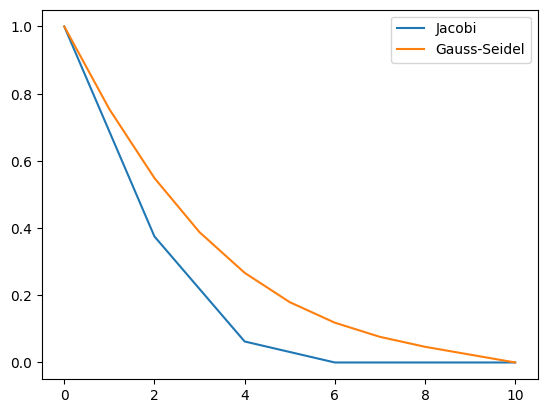

In [5]:
afJacobi=tOneDim.jacobiRelaxation(5)
afGaussSeidel=tOneDim.gaussSeidel(5)


#Plot solution values
fig = plt.figure()
plt.plot(tOneDim.afLv,afJacobi,label='Jacobi')
plt.plot(tOneDim.afLv,afGaussSeidel,label='Gauss-Seidel')
plt.legend(loc='best')
plt.show()


#### Over-relaxation

Instead of using the average of the surrounding grid-cells, another method is to use a weighted sum of the current value and the average of the surrounding values. 

$$f_i^{m+1} = (1-\alpha) f_i^m + \alpha\frac{f_{i+1}^m + f_{i-1}^m}{2}$$

We call $\alpha$ the relaxation factor. Thus, we see that if $\alpha = 1$, then this gives the Jacobi relaxation.

Using the current values, we also have the Gauss-Seidel equivalent 

$$f_i^n = (1-\alpha) f_i^c + \alpha\frac{f_{i+1} + f_{i-1}}{2}$$

Here $f_i^c$ is the current value in cell $i$, while $f_i^n$ is the updated <i>next</i> value. Again, we see that a relaxation factor of $\alpha=1$ yields the Gauss-Seidel method.

If $\alpha < 1$, then we expect a slower convergence than for the traditional $\alpha=1$ methods. However, it turns out that for $\alpha>1$ we obtain a faster convergence. Using $\alpha>1$ is called over-relaxation. Note that the method only converges for $\alpha<2$.



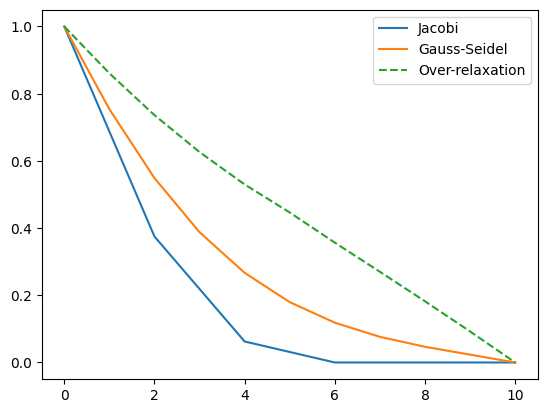

In [6]:
def overRelaxation(self,iIterations,fAlpha):
    #Solution vector
    afOR=np.zeros(self.iN)
    #Set boundary conditions
    afOR[0]=self.fBl
    afOR[-1]=self.fBr

    #Number of iterations
    itn=iIterations

    for it in range(0,itn):
        for ii in range(1,self.iN-1):
            afOR[ii]=(1-fAlpha)*afOR[ii]+fAlpha*(afOR[ii-1]+afOR[ii+1])/2
    
    return afOR

#Adding the over relaxation function to our class
Celliptic.overRelaxation=overRelaxation


afJacobi=tOneDim.jacobiRelaxation(5)
afGaussSeidel=tOneDim.gaussSeidel(5)
afOverRelax=tOneDim.overRelaxation(5,1.5)

#Plot solution values
fig = plt.figure()
plt.plot(tOneDim.afLv,afJacobi,label='Jacobi')
plt.plot(tOneDim.afLv,afGaussSeidel,label='Gauss-Seidel')
plt.plot(tOneDim.afLv,afOverRelax,label='Over-relaxation',linestyle='dashed')
plt.legend(loc='best')
plt.show()


[Previous note](partialDifferentialEquations.ipynb) -- [Next note](parabolicEquations.ipynb)

## References

[1] PRESS, W. H., FLANNERY, B. P., TEUKOLSKY, S. A., and VETTERLING, W. T. 1989. Numerical Recipes in Pascal: The Art of Scientific Computing. Cambridge University Press, Cambridge, MA.

[2] Hansen, Per Brinch. "Numerical solution of Laplace's equation." (1992).